# Predicting Online Shoppers Purchasing Intention 
----------------------
**Problem description**     
E-commerce marketing and sales departments goal is to trigger visitors to purchase. For example, offering promotion sales, packages, rewards etc. and these are very useful. What if the departments knew each individual visitor intention, The offers would be personalized and tailored to each one.        

----------------------
**Dataset**     
Online shoppers activity data is from UCI Machine Learning Repository. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.       
The dataset consists of:       
- feature vectors belonging to 12,330 sessions. 
- 10 numerical and 8 categorical attributes. 
The 'Revenue' attribute can be used as the class label.


Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).

----------------------
**Objective**
- Build a cloud-based service to predict whether the shoppers will purchase or not based on the their activity.

# Dataset Information

## Attribute Information
**"Administrative"**, **"Administrative Duration"**, **"Informational"**, **"Informational Duration"**, **"Product Related"** and **"Product Related Duration"** represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 
       
The **"Bounce Rate"**, **"Exit Rate"** and **"Page Value"** features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of **"Bounce Rate"** feature for a web page refers to the percentage of visitors who enter the site from that page and then leave (**"bounce"**) without triggering any other requests to the analytics server during that session.
The value of **"Exit Rate"** feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The **"Page Value"** feature represents the average value for a web page that a user visited before completing an e-commerce transaction.       
           
The **"Special Day"** feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.
The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.       
                   
The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

### Numerical Features
|Feature name	|Feature description	|Min. value	|Max. value	|SD|
|---|---|---|---|---|
|Administrative|	Number of pages visited by the visitor about account management	|0|	27|	3.32|
|Administrative duration|	Total amount of time (in seconds) spent by the visitor on account management related pages|	0|	3398|	176.70|
|Informational|	Number of pages visited by the visitor about Web site, communication and address information of the shopping site	|0	|24	|1.26|
|Informational duration|	Total amount of time (in seconds) spent by the visitor on informational pages|	0|	2549|	140.64|
|Product related|	Number of pages visited by visitor about product related pages|	0|	705|	44.45|
|Product related duration|	Total amount of time (in seconds) spent by the visitor on product related pages	|0	|63,973|	1912.25|
|Bounce rate|	Average bounce rate value of the pages visited by the visitor	|0	|0.2	|0.04|
|Exit rate|	Average exit rate value of the pages visited by the visitor	|0	|0.2	|0.05|
|Page value|	Average page value of the pages visited by the visitor	|0	|361	|18.55|
|Special day	|Closeness of the site visiting time to a special day	|0	|1.0	|0.19|

### Categorical Features
|Feature name	|Feature description|	Number of categorical values|
|---|---|---|
|OperatingSystems	|Operating system of the visitor	|8|
|Browser	|Browser of the visitor	|13|
|Region	|Geographic region from which the session has been started by the visitor	|9|
|TrafficType	|Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct)	|20|
|VisitorType	|Visitor type as “New Visitor,” “Returning Visitor,” and “Other”	|3|
|Weekend	|Boolean value indicating whether the date of the visit is weekend	|2|
|Month	|Month value of the visit date	|12|
|Revenue	|Class label indicating whether the visit has been finalized with a transaction|2|

# Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


# Assessing Data

In [3]:
df.sample(10).T 

,10720,5590,4025,7782,8396,1221,2017,11551,10328,8688
Administrative,5,0,3,2,0,3,9,6,0,9
Administrative_Duration,114.25,0.0,91.5,109.8,0.0,130.833333,124.125,191.0,0.0,89.166667
Informational,0,0,0,0,0,1,0,1,0,4
Informational_Duration,0.0,0.0,0.0,0.0,0.0,109.0,0.0,26.5,0.0,94.875
ProductRelated,107,4,36,55,22,47,35,37,22,10
ProductRelated_Duration,9126.982468,86.36,1266.5,1988.931429,266.166667,1813.208333,1988.658333,1874.841667,348.433333,138.416667
BounceRates,0.005612,0.0625,0.038889,0.007273,0.009091,0.0,0.008943,0.009302,0.028571,0.0
ExitRates,0.017993,0.11875,0.052778,0.00533,0.018182,0.002083,0.030662,0.010078,0.04127,0.013333
PageValues,0.0,0.0,0.0,5.790895,0.0,0.0,0.0,0.0,0.0,0.0
SpecialDay,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Check for nulls and data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Check uniques

In [5]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

## Summary stats

In [6]:
df.describe()[1:]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Check for duplicates

In [7]:
df.duplicated().sum()

125

In [8]:
df[df.duplicated()].Revenue.value_counts()

False    125
Name: Revenue, dtype: int64

## Issues
- Wrong datatype for ML 
    - object ("Month", "VisitorType")
    - bool ("Weekend", "Revenue")  
- Q "SpecialDay" is ordinal
- 125 duplicate records

# Data Cleaning

In [9]:
df.Month = df.Month.replace({'Feb':2, 'Mar':3, 'May':5, 'June':6, 'Jul':7, 
                        'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12})

In [10]:
df.VisitorType = df.VisitorType.replace({"Returning_Visitor":0 , 'New_Visitor':1, 'Other':2})

In [11]:
df.Weekend = df.Weekend.astype('int')
df.Revenue = df.Revenue.astype('int')

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.SpecialDay = (df.SpecialDay * 10).astype("int")

In [14]:
df.SpecialDay.value_counts()

0     10956
6       350
8       324
4       243
2       178
10      154
Name: SpecialDay, dtype: int64

# Split the data

In [15]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# train and val 80,  test 20
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# test 60, val 20
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=1)

In [16]:
len(X_full_train), len(X_train), len(X_val), len(X_test), len(df)

(9764, 7323, 2441, 2441, 12205)

In [17]:
sum([len(X_train), len(X_val), len(X_test)])

12205

# EDA and Prep

## Target variable "Revenue"

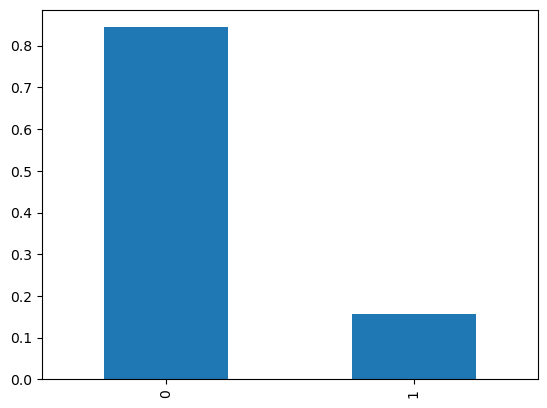

In [23]:
y_train.value_counts(normalize=True).plot(kind='bar');

In [27]:
y_train.mean()

0.15594701625017068

## plots
 

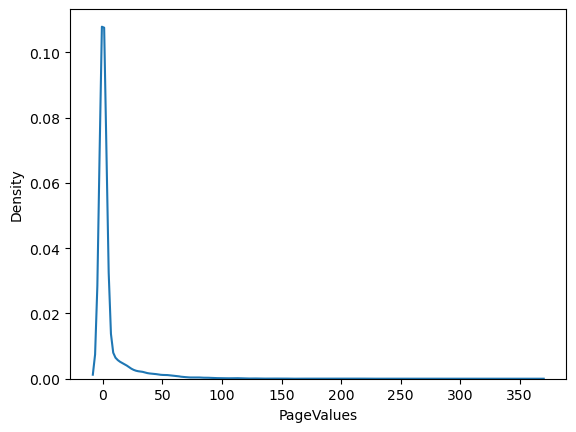

In [10]:
sns.kdeplot(df.PageValues);

<AxesSubplot:xlabel='PageValues', ylabel='Density'>

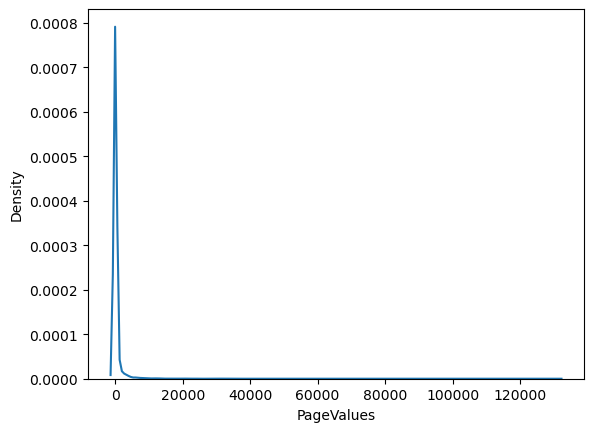

In [32]:
sns.kdeplot(np.power(df.PageValues, 2))

<AxesSubplot:xlabel='PageValues', ylabel='Density'>

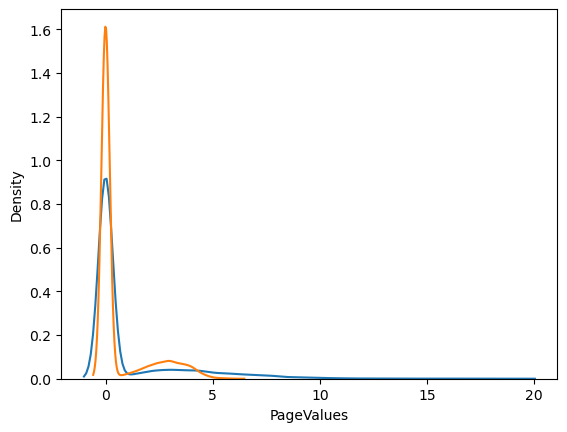

In [29]:
sns.kdeplot(np.sqrt(df.PageValues))
sns.kdeplot(np.log1p(df.PageValues))
# sns.kdeplot(df.PageValues);

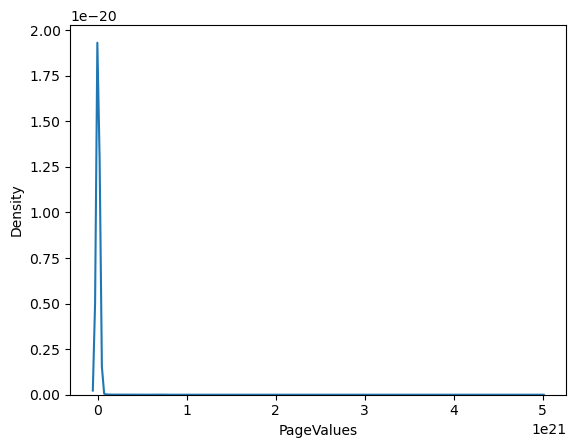

In [23]:
sns.kdeplot(np.exp(df[df.PageValues < 50].PageValues));

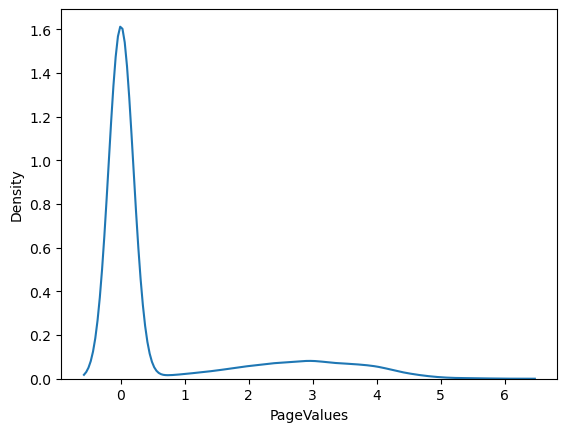

In [18]:
sns.kdeplot(np.log1p(df.PageValues));

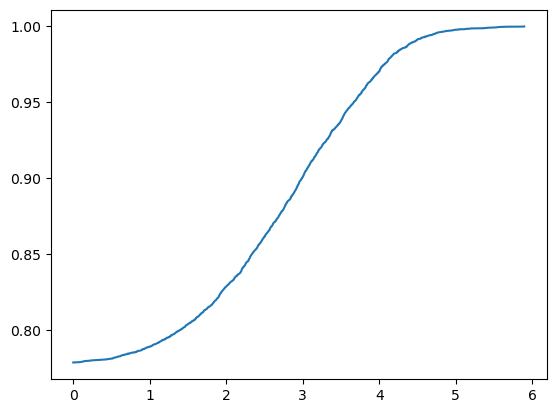

In [12]:
np.log1p(df.PageValues).value_counts(normalize=True).sort_index().cumsum().plot();

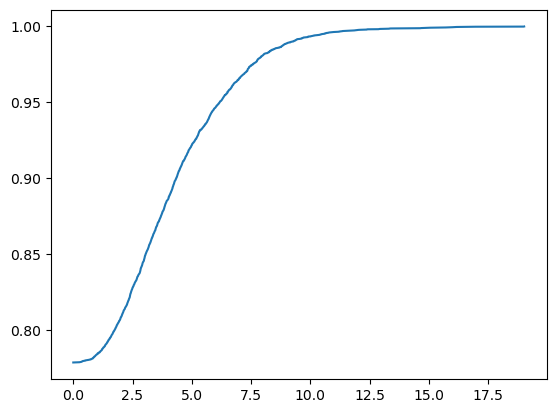

In [157]:
np.sqrt(df.PageValues).value_counts(normalize=True).sort_index().cumsum().plot();

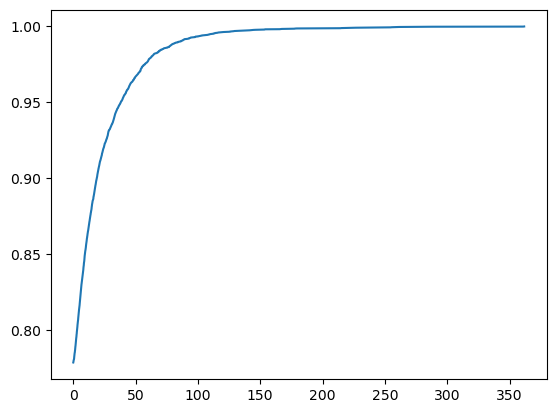

In [156]:
df.PageValues.value_counts(normalize=True).sort_index().cumsum().plot();

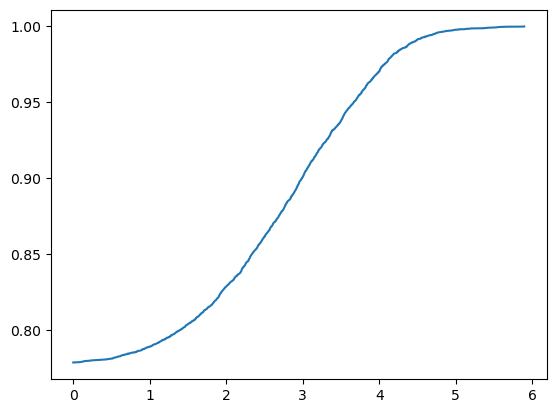

In [151]:
np.log1p(df.PageValues).value_counts(normalize=True).sort_index().cumsum().plot();

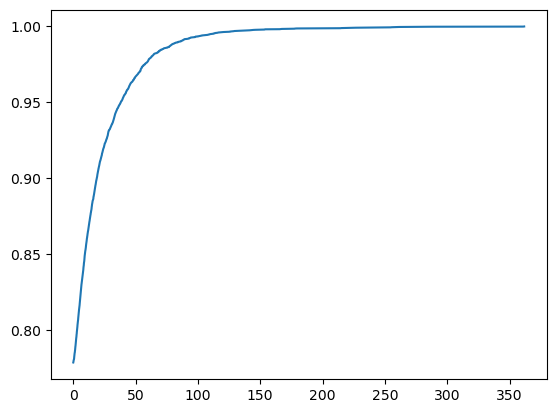

In [9]:
df.PageValues.value_counts(normalize=True).sort_index().cumsum().plot();

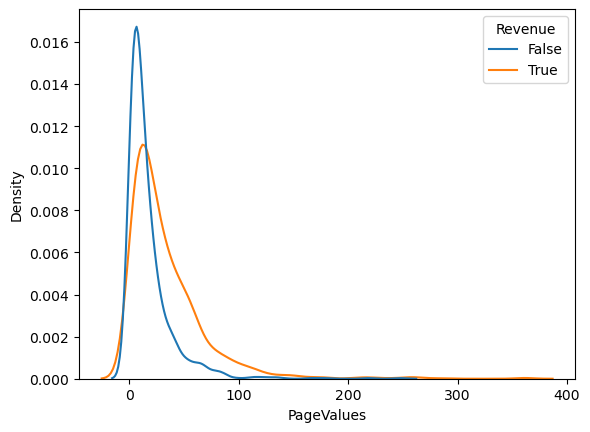

In [358]:
sns.kdeplot(df[df.PageValues > 0].PageValues, hue=df.Revenue);

## Univariate

In [33]:
numerical_features = df.dtypes[df.dtypes == "float64"].index.to_list()
categorical_features = df.dtypes[df.dtypes == "int64"].index.to_list()[:-1]

In [290]:
df[numerical_features].nunique()

Administrative_Duration    3335
Informational_Duration     1258
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
dtype: int64

In [291]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                   int64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
Revenue                      int64
dtype: object

In [289]:
df[categorical_features].nunique()

Administrative       27
Informational        17
ProductRelated      311
SpecialDay            6
Month                10
OperatingSystems      8
Browser              13
Region                9
TrafficType          20
VisitorType           3
Weekend               2
Revenue               2
dtype: int64

### PMF

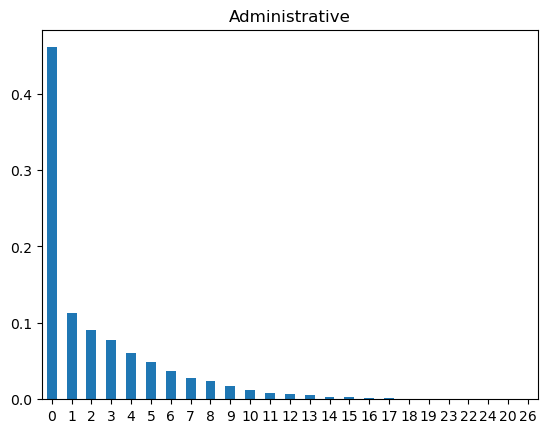

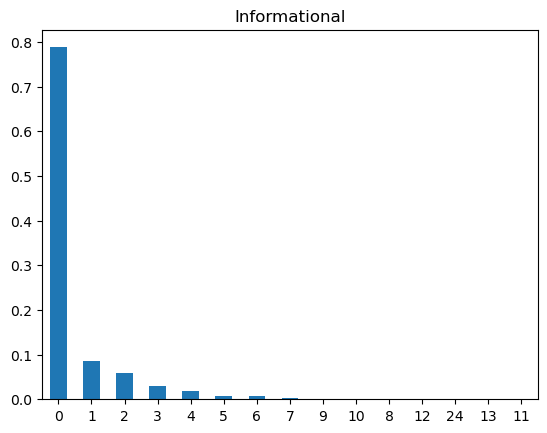

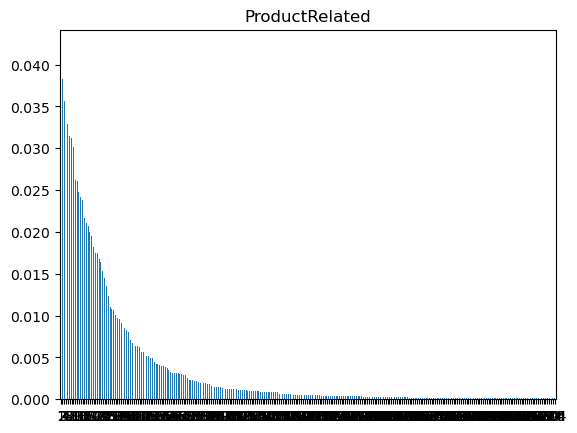

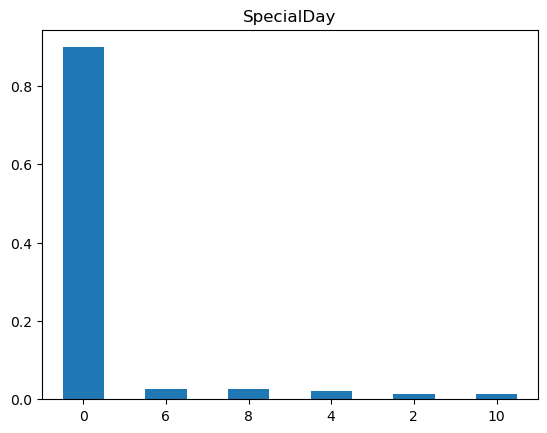

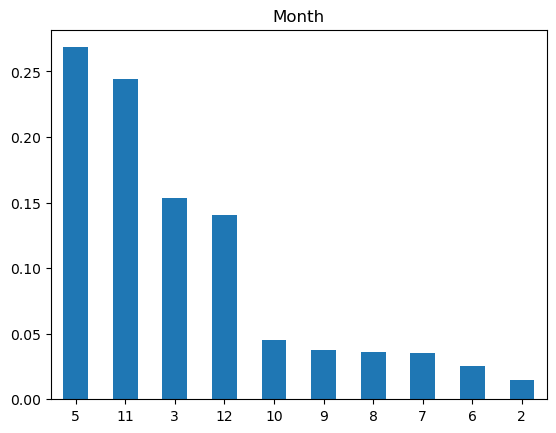

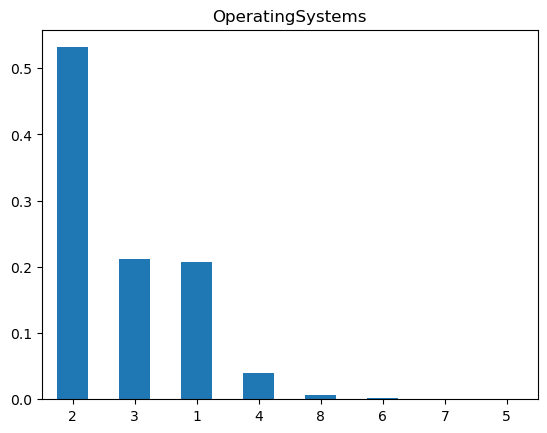

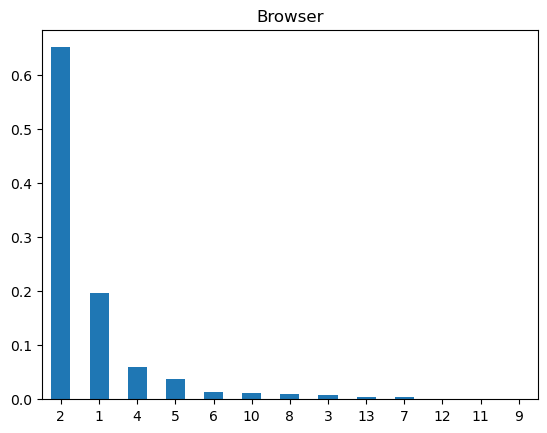

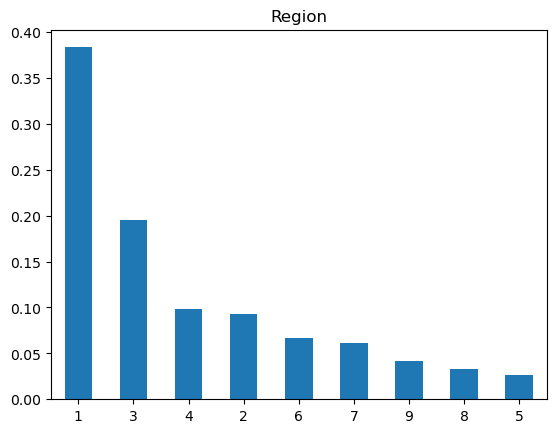

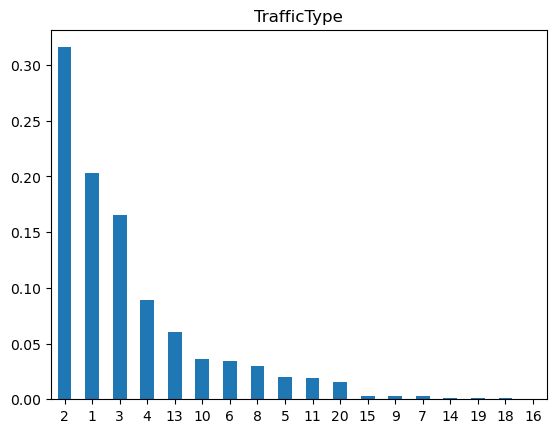

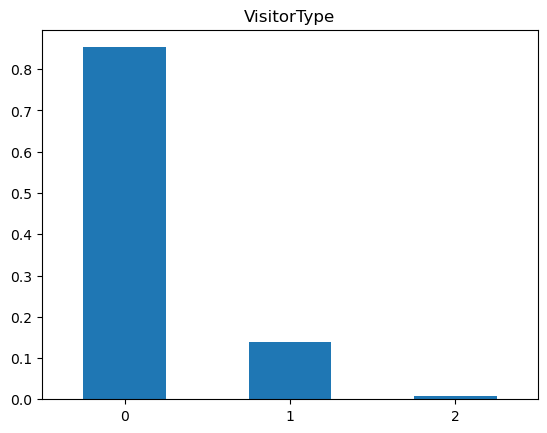

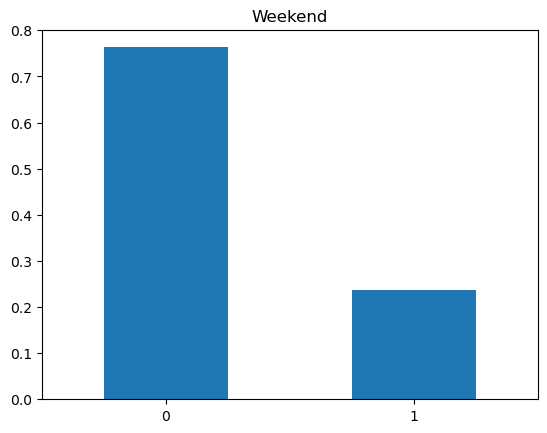

In [34]:
for col in categorical_features:
    plt.figure()
    X_train[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0);

### KDE

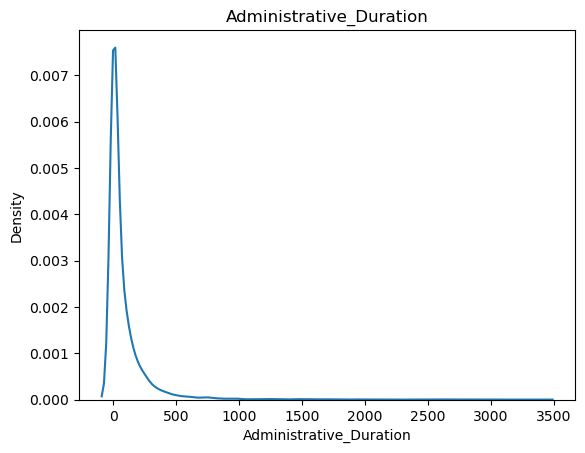

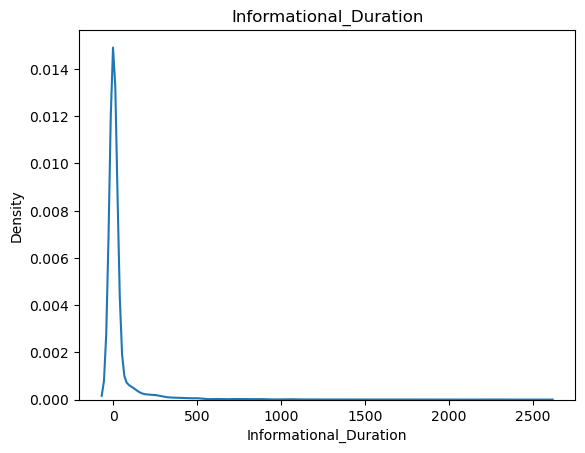

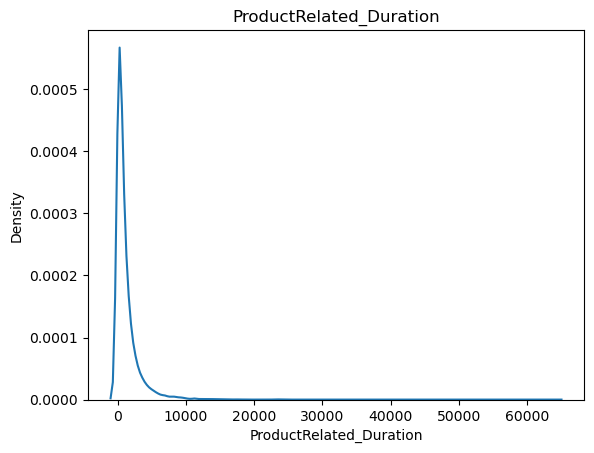

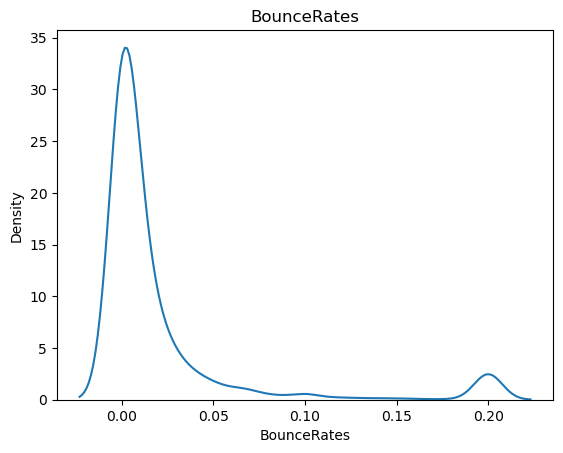

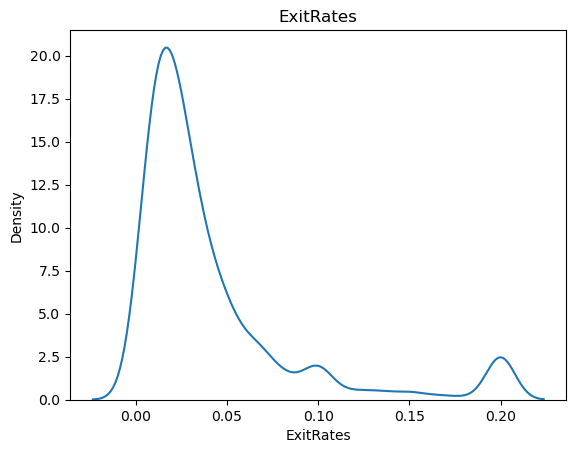

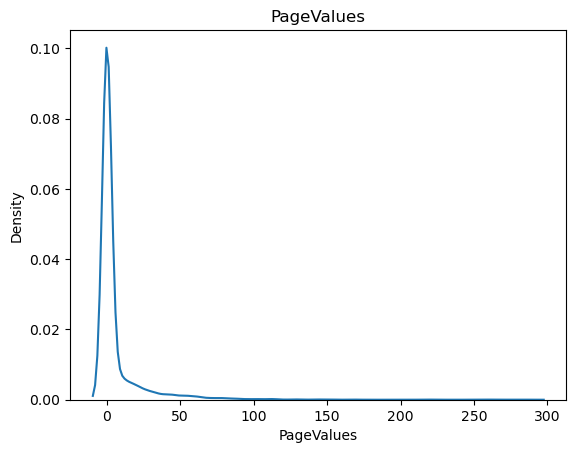

In [31]:
for col in numerical_features:
    plt.figure()
    sns.kdeplot(X_train[col])
    plt.title(col);

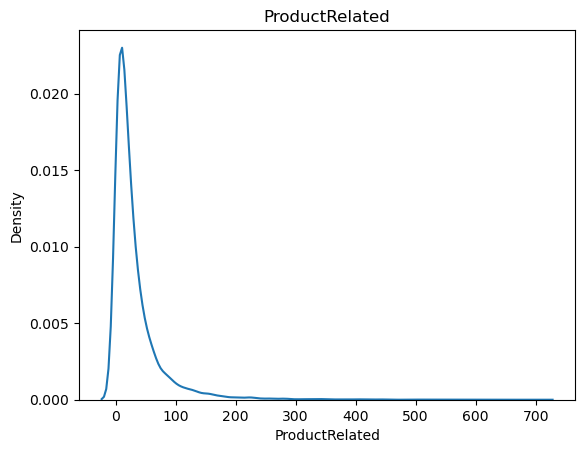

In [35]:
sns.kdeplot(X_train.ProductRelated)
plt.title("ProductRelated");

## Numerical Correlation

In [39]:
X_train[numerical_features].corrwith(y_train)

Administrative_Duration    0.092363
Informational_Duration     0.067918
ProductRelated_Duration    0.137934
BounceRates               -0.145719
ExitRates                 -0.203656
PageValues                 0.493696
dtype: float64

In [45]:
np.sqrt(X_train[numerical_features]).corrwith(y_train)

Administrative_Duration    0.144622
Informational_Duration     0.097550
ProductRelated_Duration    0.195878
BounceRates               -0.161681
ExitRates                 -0.231876
PageValues                 0.617668
dtype: float64

In [121]:
np.log1p(X_train[numerical_features]).corrwith(y_train)

Administrative_Duration    0.163058
Informational_Duration     0.107641
ProductRelated_Duration    0.195879
BounceRates               -0.147854
ExitRates                 -0.207147
PageValues                 0.637454
dtype: float64

In [133]:
trans_dict = {}
for trans in [np.log1p, np.sqrt, np.reciprocal]:
    trans_dict[trans.__name__] = trans(X_train[numerical_features]).corrwith(y_train).abs()
pd.DataFrame(trans_dict)

/root/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in reciprocal
  result = func(self.values, **kwargs)


,log1p,sqrt,reciprocal
Administrative_Duration,0.163058,0.144622,NaN
Informational_Duration,0.107641,0.097550,NaN
ProductRelated_Duration,0.195879,0.195878,NaN
BounceRates,0.147854,0.161681,NaN
ExitRates,0.207147,0.231876,NaN
PageValues,0.637454,0.617668,NaN


In [143]:
trans_results = pd.DataFrame(trans_dict).idxmax(axis=1)
trans_results

Administrative_Duration    log1p
Informational_Duration     log1p
ProductRelated_Duration    log1p
BounceRates                 sqrt
ExitRates                   sqrt
PageValues                 log1p
dtype: object

## Correlation

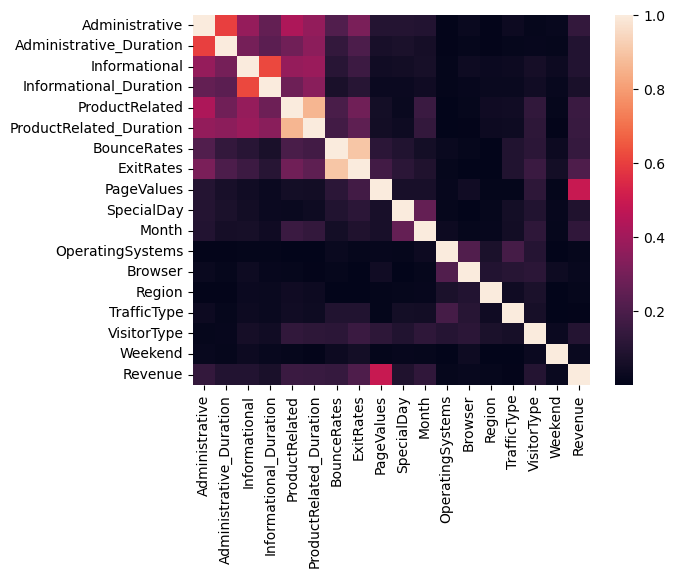

In [183]:
sns.heatmap(np.abs(df.corr()));

In [197]:
df[["Administrative", "Administrative_Duration", "Revenue"]].corr()

,Administrative,Administrative_Duration,Revenue
Administrative,1.000000,0.600457,0.136330
Administrative_Duration,0.600457,1.000000,0.091768
Revenue,0.136330,0.091768,1.000000


In [159]:
df.corr().Revenue 

Administrative             0.138917
Administrative_Duration    0.093587
Informational              0.095200
Informational_Duration     0.070345
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates               -0.150673
ExitRates                 -0.207071
PageValues                 0.492569
SpecialDay                -0.082305
OperatingSystems          -0.014668
Browser                    0.023984
Region                    -0.011595
TrafficType               -0.005113
Weekend                    0.029295
Revenue                    1.000000
Name: Revenue, dtype: float64

# Feature Importance

## Mutual Informaton

In [213]:
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(X, y, discrete_features=False):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores 

In [208]:
mi_scores = make_mi_scores(df.iloc[:,:-1], df.Revenue, df.iloc[:,:-1].dtypes == int)
mi_scores[::3]  # show a few features with their MI scores

PageValues                 0.166688
ProductRelated_Duration    0.031080
TrafficType                0.015393
Informational              0.006302
Informational_Duration     0.004761
Region                     0.000402
Name: MI Scores, dtype: float64

In [ ]:
mi_scores

PageValues                 0.164433
ExitRates                  0.043162
ProductRelated             0.037646
ProductRelated_Duration    0.032749
BounceRates                0.026343
Administrative             0.016866
TrafficType                0.015804
Month                      0.015425
Administrative_Duration    0.013321
Informational              0.006489
SpecialDay                 0.004928
VisitorType                0.004911
Informational_Duration     0.003386
OperatingSystems           0.003215
Browser                    0.001197
Weekend                    0.000420
Region                     0.000381
Name: MI Scores, dtype: float64

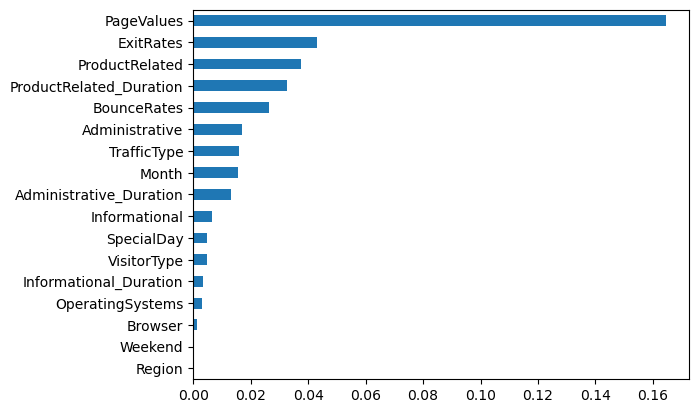

In [ ]:
mi_scores.sort_values(ascending=True).plot(kind='barh');

## Correlation

In [ ]:
df[categorical_features].corr()

,Administrative,Informational,ProductRelated,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.375256,0.428305,-0.096951,0.094423,-0.006586,-0.025622,-0.007262,-0.034643,0.015294,0.023825,0.136330
Informational,0.375256,1.000000,0.372572,-0.049350,0.062173,-0.009721,-0.038787,-0.030317,-0.035197,-0.059403,0.034359,0.093626
ProductRelated,0.428305,0.372572,1.000000,-0.025839,0.154323,0.004194,-0.013586,-0.040108,-0.044223,-0.130353,0.013477,0.156042
SpecialDay,-0.096951,-0.049350,-0.025839,1.000000,-0.259992,0.012806,0.003528,-0.016450,0.052856,-0.087836,-0.017723,-0.083601
Month,0.094423,0.062173,0.154323,-0.259992,1.000000,0.035650,0.016063,0.020346,0.050484,0.123260,0.014499,0.126412
OperatingSystems,-0.006586,-0.009721,0.004194,0.012806,0.035650,1.000000,0.212335,0.071864,0.183074,0.100552,0.001894,-0.014927
Browser,-0.025622,-0.038787,-0.013586,0.003528,0.016063,0.212335,1.000000,0.092038,0.102868,0.115420,-0.039704,0.024052
Region,-0.007262,-0.030317,-0.040108,-0.016450,0.020346,0.071864,0.092038,1.000000,0.042873,0.071521,-0.001553,-0.012725
TrafficType,-0.034643,-0.035197,-0.044223,0.052856,0.050484,0.183074,0.102868,0.042873,1.000000,0.061727,-0.002133,-0.005618
VisitorType,0.015294,-0.059403,-0.130353,-0.087836,0.123260,0.100552,0.115420,0.071521,0.061727,1.000000,0.030000,0.098137


In [ ]:
df.iloc[:,:-1].corrwith(df.Revenue)

Administrative             0.136330
Administrative_Duration    0.091768
Informational              0.093626
Informational_Duration     0.069358
ProductRelated             0.156042
ProductRelated_Duration    0.150077
BounceRates               -0.145091
ExitRates                 -0.204320
PageValues                 0.491894
SpecialDay                -0.083601
Month                      0.126412
OperatingSystems          -0.014927
Browser                    0.024052
Region                    -0.012725
TrafficType               -0.005618
VisitorType                0.098137
Weekend                    0.027729
dtype: float64

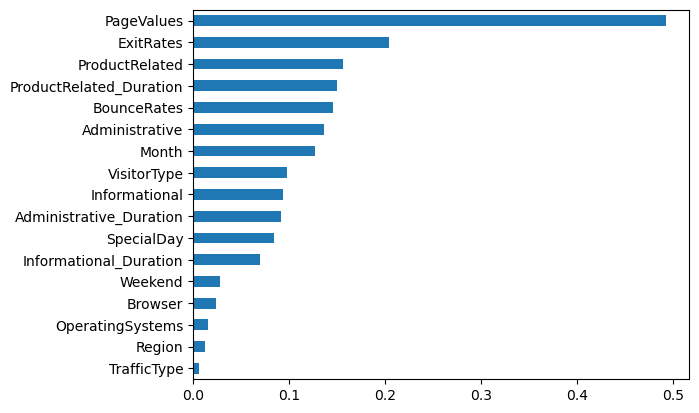

In [ ]:
np.abs(df.corr().Revenue)[:-1].sort_values(ascending=True).plot(kind='barh');

# Model Selection

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score, cross_validate

/root/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/root/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

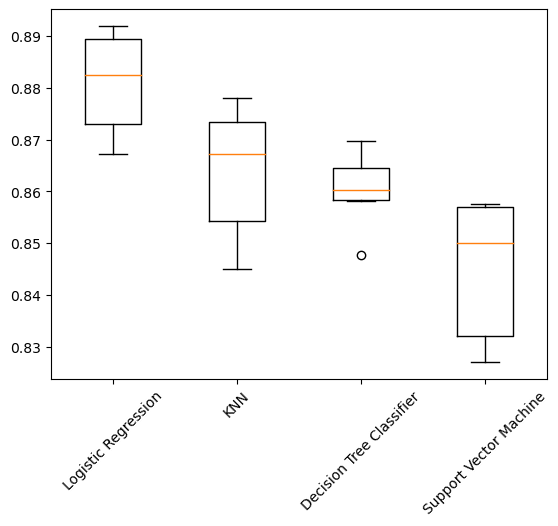

In [22]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), 
          "Decision Tree Classifier": DecisionTreeClassifier(), "Support Vector Machine": SVC()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring="accuracy")
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.xticks(rotation=45)
plt.show();

# Pipeline

In [493]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score

In [500]:
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline

In [145]:
trans_results[trans_results == 'sqrt']

BounceRates    sqrt
ExitRates      sqrt
dtype: object

In [185]:
trans_results[trans_results=='log1p'].index

Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'PageValues'],
      dtype='object')

In [267]:
X_train[numerical_features].describe()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000
mean,82.564560,32.949587,1222.575255,0.020688,0.041741,6.096078
std,184.250803,135.298079,2038.471819,0.045584,0.046719,18.842071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,192.887500,0.000000,0.014000,0.000000
50%,9.000000,0.000000,605.672222,0.003030,0.025000,0.000000
75%,94.350000,0.000000,1470.909852,0.016667,0.049517,0.000000
max,3398.750000,2549.375000,63973.522230,0.200000,0.200000,287.953793


In [283]:
[X_train.columns.get_loc(c) for c in numerical_features]

[1, 3, 5, 6, 7, 8]

In [425]:
X_train[categorical_features].nunique()

Administrative       25
Informational        15
ProductRelated      270
SpecialDay            6
Month                10
OperatingSystems      8
Browser              13
Region                9
TrafficType          18
VisitorType           3
Weekend               2
dtype: int64

In [424]:
X_train[numerical_features].nunique()

Administrative_Duration    2254
Informational_Duration      849
ProductRelated_Duration    6012
BounceRates                1291
ExitRates                  3099
PageValues                 1646
dtype: int64

In [384]:
[X_train.columns.get_loc(c) for c in trans_results[trans_results=='sqrt'].index]

[6, 7]

In [577]:
numerical_features

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [540]:
transformations = [
    ("log1p", FunctionTransformer(np.log1p), [X_train.columns.get_loc(c) for c in trans_results[trans_results=='log1p'].index]),  
    ("sqrt", FunctionTransformer(np.sqrt), [X_train.columns.get_loc(c) for c in trans_results[trans_results=='sqrt'].index]),
    ('encode_categ', OneHotEncoder(drop='first', handle_unknown="infrequent_if_exist", dtype='int32'), 
            categorical_features)
]
ct = ColumnTransformer(transformers=transformations, 
            remainder='passthrough'
            )

ct_scale = ColumnTransformer(transformers=[("scale", StandardScaler(with_mean=False), [X_train.columns.get_loc(c) for c in numerical_features])], 
            remainder='passthrough'
            )

In [571]:
pipe = Pipeline(steps=[
    ('smote', SMOTENC([X_train.columns.get_loc(c) for c in categorical_features], random_state=42)),
         
    ('col_trans', ct),
    
    # ("scale", StandardScaler(with_mean=False)),
    ('ct_scale', ct_scale), 

    ("lgr", LogisticRegression(random_state=42, max_iter=1000)) 
    # ("dtc", DecisionTreeClassifier(random_state=42, max_depth=6)) 
])

In [572]:
pipe 

Pipeline(steps=[('smote',
                 SMOTENC(categorical_features=[0, 2, 4, 9, 10, 11, 12, 13, 14,
                                               15, 16],
                         random_state=42)),
                ('col_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log1p',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  [1, 3, 5, 8]),
                                                 ('sqrt',
                                                  FunctionTransformer(func=<ufunc 'sqrt'>),
                                                  [6, 7]),
                                                 ('encode_categ',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int32',
                                                                handl...if_exist'),
                                                  ['Administrative',
                                                   'Informational',
                                                   'ProductRelated',
                                                   'SpecialDay', 'Month',
                                                   'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Weekend'])])),
                ('ct_scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale',
                                                  StandardScaler(with_mean=False),
                                                  [1, 3, 5, 6, 7, 8])])),
                ('lgr', LogisticRegression(max_iter=1000, random_state=42))])

In [573]:
# kf = KFold(n_splits=5, random_state=12, shuffle=True)
kf = StratifiedKFold(n_splits=5, random_state=12, shuffle=True)
# cv = cross_validate(pipe, X_train, y_train, cv=kf, scoring={'acc': 'accuracy',
cv = cross_validate(pipe, X_full_train, y_full_train, cv=kf, scoring={'acc': 'accuracy',
                                                    'prec_macro': 'precision_macro',
                                                    'rec_micro': 'recall_macro',
                                                    'f1_score': 'f1', 
                                                    'roc_auc': 'roc_auc'}, return_train_score=True,
                                                    return_estimator=True)

/root/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/root/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/root/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [2, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/root/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [2, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/root/anaconda3/envs/m

In [574]:
# smote + trans + one hot + scale
pd.DataFrame(cv).drop('estimator', axis=1)

,fit_time,score_time,test_acc,train_acc,test_prec_macro,train_prec_macro,test_rec_micro,train_rec_micro,test_f1_score,train_f1_score,test_roc_auc,train_roc_auc
0,4.325354,0.048517,0.869432,0.884778,0.750910,0.776049,0.793270,0.824061,0.616541,0.662416,0.887530,0.910959
1,2.690912,0.062656,0.874552,0.886186,0.758850,0.778377,0.792202,0.823528,0.622496,0.664148,0.877054,0.909600
2,2.635267,0.064302,0.863799,0.886954,0.741718,0.779663,0.783122,0.823981,0.600601,0.665657,0.883505,0.909720
3,2.757300,0.045117,0.882232,0.885162,0.771979,0.776678,0.818566,0.822581,0.654655,0.661892,0.896060,0.907403
4,2.562103,0.046664,0.875512,0.885049,0.760191,0.776620,0.799110,0.819207,0.629008,0.659332,0.868293,0.909724


In [530]:
# decision tree 
# trans + one hot + scale
pd.DataFrame(cv).drop('estimator', axis=1)

,fit_time,score_time,test_acc,train_acc,test_prec_macro,train_prec_macro,test_rec_micro,train_rec_micro,test_f1_score,train_f1_score,test_roc_auc,train_roc_auc
0,0.165793,0.197960,0.895563,0.921987,0.809540,0.879000,0.771800,0.806185,0.638298,0.718423,0.903193,0.936039
1,0.216742,0.098167,0.891468,0.917549,0.802047,0.856441,0.763129,0.815417,0.624113,0.716049,0.885323,0.933544
2,0.063027,0.070227,0.890785,0.917378,0.806309,0.864242,0.746714,0.802366,0.605911,0.705596,0.902838,0.941289
3,0.074680,0.064596,0.900273,0.918928,0.829056,0.872139,0.762093,0.799908,0.636816,0.706971,0.907370,0.933408
4,0.067906,0.077432,0.898224,0.918928,0.816875,0.864913,0.773399,0.809719,0.644391,0.714715,0.899327,0.934482


In [512]:
# decision tree 
# smote + trans + one hot + scale
pd.DataFrame(cv).drop('estimator', axis=1)

,fit_time,score_time,test_acc,train_acc,test_prec_macro,train_prec_macro,test_rec_micro,train_rec_micro,test_f1_score,train_f1_score,test_roc_auc,train_roc_auc
0,2.263819,0.037599,0.849829,0.867873,0.736033,0.759058,0.834158,0.858850,0.627119,0.666379,0.906827,0.924847
1,1.254568,0.033142,0.889420,0.900819,0.786682,0.805431,0.827733,0.846589,0.676000,0.707010,0.912286,0.929196
2,1.306810,0.070118,0.887372,0.897405,0.783160,0.798826,0.828299,0.851711,0.673267,0.704668,0.892301,0.928311
3,1.433087,0.037726,0.868169,0.875235,0.755617,0.766734,0.834291,0.853400,0.649728,0.672638,0.911734,0.926976
4,1.238777,0.044275,0.877732,0.880526,0.768720,0.773317,0.843532,0.851629,0.669131,0.678899,0.913838,0.927929


In [491]:
# smote + trans + one hot + scale
pd.DataFrame(cv).drop('estimator', axis=1)

,fit_time,score_time,test_acc,train_acc,test_prec_macro,train_prec_macro,test_rec_micro,train_rec_micro,test_f1_score,train_f1_score,test_roc_auc,train_roc_auc
0,3.395445,0.087583,0.875085,0.891089,0.762266,0.789192,0.802605,0.830242,0.634731,0.680040,0.886773,0.917941
1,1.825202,0.051624,0.877133,0.891089,0.766221,0.788934,0.790211,0.831895,0.628099,0.681000,0.883781,0.915488
2,1.948622,0.039247,0.877816,0.888529,0.767384,0.784581,0.801289,0.830825,0.638384,0.676252,0.890109,0.917066
3,1.703367,0.042294,0.875000,0.888206,0.762060,0.784245,0.797202,0.828531,0.630303,0.674291,0.894279,0.913007
4,2.141941,0.035130,0.870902,0.888548,0.755488,0.784968,0.794775,0.824720,0.622754,0.672024,0.903952,0.914797


In [375]:
# scale + smote
pd.DataFrame(cv).drop('estimator', axis=1)

,fit_time,score_time,test_acc,train_acc,test_prec_macro,train_prec_macro,test_rec_micro,train_rec_micro,test_f1_score,train_f1_score,test_roc_auc,train_roc_auc
0,2.347255,0.016722,0.831399,0.839365,0.711506,0.715151,0.799990,0.784438,0.582064,0.577838,0.876668,0.870429
1,1.515245,0.009257,0.830717,0.840731,0.702051,0.717235,0.764482,0.788224,0.552347,0.582176,0.845052,0.871776
2,1.187144,0.011866,0.849829,0.847217,0.727339,0.724228,0.788261,0.789387,0.592593,0.590014,0.864664,0.868895
3,1.531543,0.017114,0.844945,0.844001,0.721470,0.720466,0.788345,0.787181,0.586521,0.584923,0.872072,0.868188
4,1.485124,0.015917,0.831967,0.843147,0.701818,0.718685,0.760986,0.783108,0.549451,0.580557,0.859759,0.864518


In [367]:
# trans + one hot + smote
pd.DataFrame(cv).drop('estimator', axis=1)

,fit_time,score_time,test_acc,train_acc,test_prec_macro,train_prec_macro,test_rec_micro,train_rec_micro,test_f1_score,train_f1_score,test_roc_auc,train_roc_auc
0,3.004881,0.041697,0.875085,0.892796,0.762200,0.792209,0.800816,0.830807,0.633267,0.683148,0.884536,0.918732
1,1.903420,0.057590,0.879181,0.891772,0.769848,0.790136,0.791425,0.831853,0.632017,0.682046,0.880082,0.916449
2,2.373407,0.038383,0.877133,0.891601,0.766212,0.789683,0.797327,0.834877,0.634146,0.683922,0.886184,0.918109
3,1.965648,0.036584,0.873634,0.890254,0.759769,0.787768,0.794605,0.828853,0.626263,0.677694,0.889648,0.913739
4,2.251763,0.034559,0.869536,0.889230,0.753359,0.786147,0.793966,0.825124,0.620278,0.673377,0.900017,0.915502


In [303]:
# trans + one hot
pd.DataFrame(cv).drop('estimator', axis=1)

,fit_time,score_time,test_acc,train_acc,test_prec_macro,train_prec_macro,test_rec_micro,train_rec_micro,test_f1_score,train_f1_score,test_roc_auc,train_roc_auc
0,0.249866,0.059317,0.890102,0.902356,0.797708,0.832482,0.761412,0.769584,0.619385,0.648216,0.909352,0.932956
1,0.155112,0.049082,0.892833,0.906794,0.809922,0.839756,0.753265,0.782701,0.616137,0.668287,0.900743,0.932300
2,0.171448,0.048431,0.901706,0.902014,0.835243,0.829073,0.762081,0.773172,0.640000,0.650852,0.893197,0.933673
3,0.212335,0.050153,0.894126,0.905103,0.811468,0.836787,0.756664,0.778340,0.621027,0.661389,0.909811,0.931573
4,0.197150,0.046142,0.889344,0.904933,0.800779,0.835519,0.746679,0.779577,0.602941,0.662220,0.914538,0.931065


In [288]:
# trans + scale
pd.DataFrame(cv).drop('estimator', axis=1)

,fit_time,score_time,test_acc,train_acc,test_prec_macro,train_prec_macro,test_rec_micro,train_rec_micro,test_f1_score,train_f1_score,test_roc_auc,train_roc_auc
0,0.313771,0.068831,0.895563,0.894674,0.796843,0.817681,0.754758,0.758567,0.606684,0.627640,0.901636,0.911446
1,0.083404,0.042845,0.898294,0.892284,0.796884,0.811775,0.761177,0.758303,0.612987,0.624628,0.916300,0.909252
2,0.073257,0.015206,0.888737,0.896893,0.815493,0.816979,0.768529,0.749932,0.643326,0.613811,0.914487,0.908046
3,0.070475,0.025351,0.891393,0.894009,0.818980,0.810431,0.727537,0.758601,0.584856,0.622951,0.889486,0.914078
4,0.120125,0.036741,0.895492,0.894180,0.839947,0.809254,0.749462,0.752621,0.627737,0.613948,0.913924,0.908119


In [198]:
# only trans
pd.DataFrame(cv).drop('estimator', axis=1)

,fit_time,score_time,test_acc,train_acc,test_prec_macro,train_prec_macro,test_rec_micro,train_rec_micro,test_f1_score,train_f1_score,test_roc_auc,train_roc_auc
0,0.191472,0.022729,0.897611,0.895186,0.804111,0.820999,0.752037,0.755382,0.607330,0.625153,0.890192,0.898449
1,0.091195,0.019519,0.895563,0.893308,0.790489,0.814675,0.755551,0.758912,0.602597,0.626866,0.915113,0.909535
2,0.152474,0.031391,0.887372,0.895357,0.811345,0.812643,0.769285,0.748105,0.642082,0.609305,0.914566,0.908143
3,0.067498,0.018406,0.893443,0.894521,0.825040,0.813697,0.730531,0.754885,0.591623,0.619926,0.883885,0.909783
4,0.134060,0.022191,0.894809,0.894521,0.836420,0.809663,0.750700,0.754189,0.628019,0.616149,0.915835,0.907652


In [211]:
cv_no_trans = cross_validate(LogisticRegression(), X_train, y_train, cv=kf, scoring={'acc': 'accuracy',
                                                    'prec_macro': 'precision_macro',
                                                    'rec_micro': 'recall_macro',
                                                    'f1_score': 'f1', 
                                                    'roc_auc': 'roc_auc'}, return_train_score=True,
                                                    return_estimator=True)

/root/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/root/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [212]:
pd.DataFrame(cv_no_trans).drop('estimator', axis=1)

,fit_time,score_time,test_acc,train_acc,test_prec_macro,train_prec_macro,test_rec_micro,train_rec_micro,test_f1_score,train_f1_score,test_roc_auc,train_roc_auc
0,0.116766,0.015833,0.888055,0.876579,0.810013,0.810954,0.673950,0.662759,0.490683,0.473416,0.831024,0.813105
1,0.074690,0.010625,0.885324,0.880335,0.785485,0.817705,0.672905,0.678850,0.481481,0.505293,0.799694,0.829298
2,0.169917,0.029575,0.873720,0.881017,0.821315,0.808122,0.680459,0.664587,0.511873,0.474755,0.849442,0.812694
3,0.090177,0.009766,0.883197,0.882744,0.830424,0.811684,0.671101,0.684946,0.492582,0.513800,0.791793,0.831989
4,0.126759,0.013478,0.875683,0.884281,0.817682,0.813117,0.676606,0.683023,0.502732,0.510116,0.827878,0.823799


<Figure size 640x480 with 0 Axes>

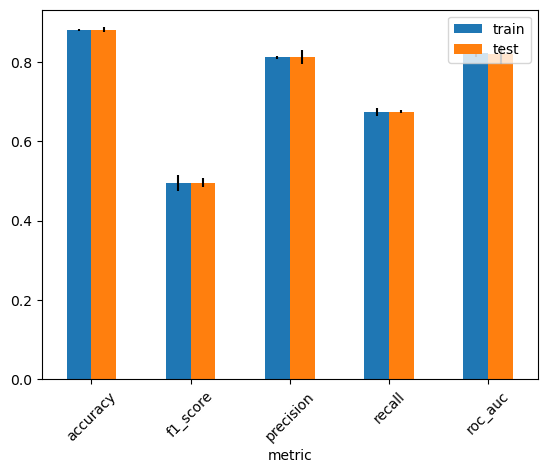

<Figure size 640x480 with 0 Axes>

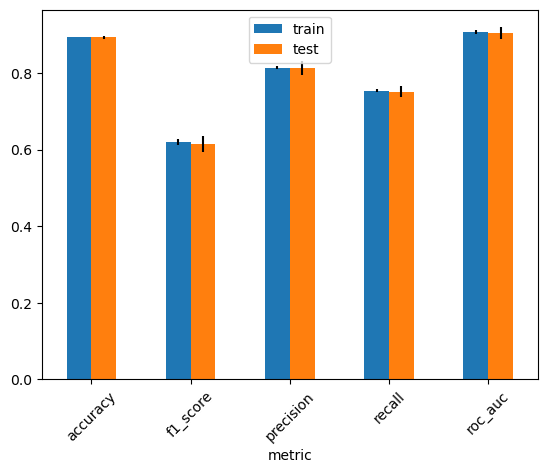

In [259]:
for dfx in [cv_no_trans_df, cv_df]:
    plt.figure()
    df_melt = dfx.iloc[:, 3::2].rename(columns={'train_acc':'accuracy', 'train_prec_macro':'precision',
        'train_rec_micro':'recall', 'train_f1_score':'f1_score',
        'train_roc_auc':'roc_auc'}).melt().rename(columns={'variable':'metric', 'value':'train'}).join(
            dfx.iloc[:, 2::2].melt().rename(columns={'variable':'metric', 'value':'test'})['test']
        )

    df_melt.groupby('metric').mean().plot(kind='bar', rot=45, yerr=df_melt.groupby('metric').std());

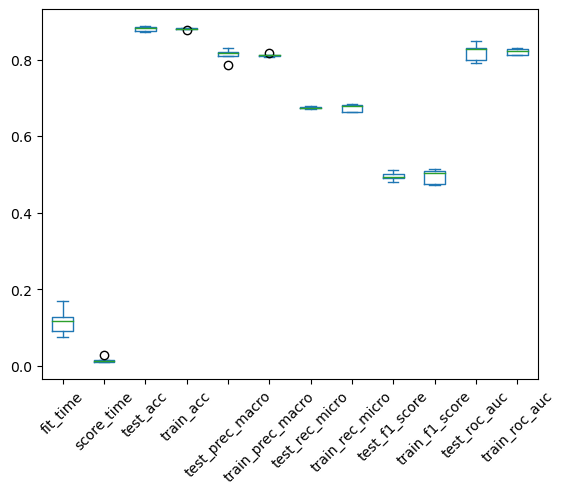

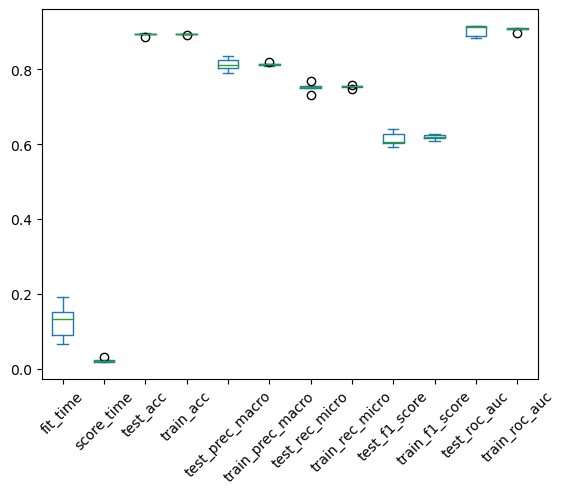

In [258]:
cv_no_trans_df = pd.DataFrame(cv_no_trans).drop('estimator', axis=1)
cv_df = pd.DataFrame(cv).drop('estimator', axis=1)
cv_cocat = pd.concat([cv_no_trans_df, cv_df], keys=['no', 'yes']).reset_index().drop('level_1', axis=1)
# cv_cocat[cv_cocat.level_0 == 'no']
cv_cocat[cv_cocat.level_0 == 'no'].plot(kind='box', rot=45)
cv_cocat[cv_cocat.level_0 == 'yes'].plot(kind='box', rot=45);

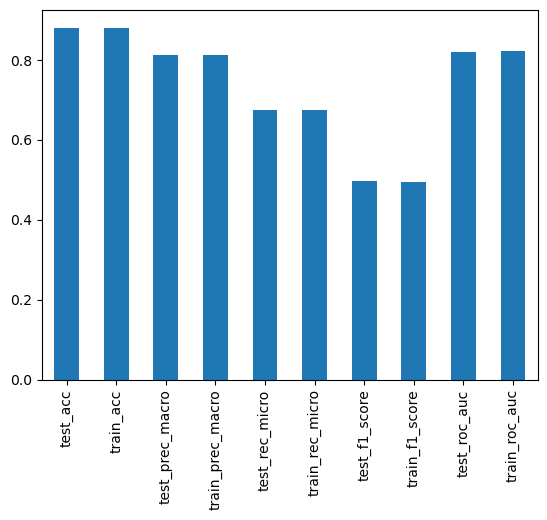

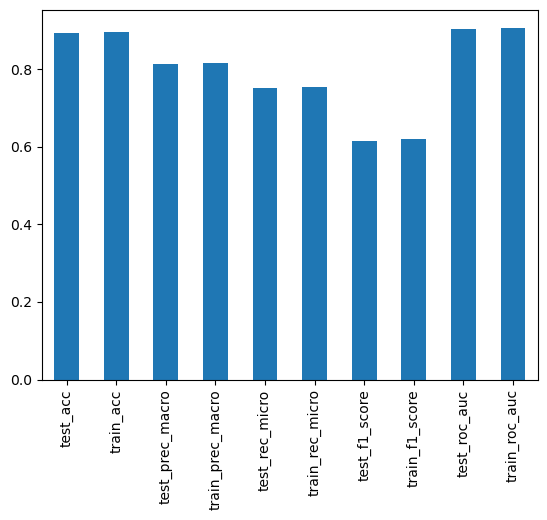

In [219]:
for frame in [pd.DataFrame(cv_no_trans).drop('estimator', axis=1), pd.DataFrame(cv).drop('estimator', axis=1)]:
    plt.figure()
    frame.iloc[:,2:].mean().plot(kind='bar');

In [25]:
modeling_pipeline = Pipeline(steps=[#('preprocessor', preprocessor),
                              ('logistic', LogisticRegression())
                             ])

params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Preprocessing of training data, fit model 
modeling_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = modeling_pipeline.predict(X_val)

# Evaluate the model
# score = accuracy(y_val, preds)
# print('accuracy:', score)

/root/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Hyperparameter Tuning

In [28]:
modeling_pipeline = Pipeline(steps=[#('preprocessor', preprocessor),
                              ('logistic', LogisticRegression())
                             ])

params = {"logistic__solver": ["newton-cg", "saga", "lbfgs"],
         "logistic__C": np.linspace(0.001, 1.0, 5)}


# Create the GridSearchCV object
tuning = GridSearchCV(modeling_pipeline, param_grid=params, scoring='accuracy')
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_val)

/root/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/anaconda3/envs

In [29]:
# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

Tuned Logistic Regression Parameters: {'logistic__C': 0.5005, 'logistic__solver': 'lbfgs'}, Accuracy: 0.8721835313396149


# Final 
- train and predict function
    - dict vict

In [22]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
X_train_dv = dv.fit_transform(X_train[df.columns[:-1]].to_dict(orient='records'))

In [18]:
dv.feature_names_

['Administrative',
 'Administrative_Duration',
 'BounceRates',
 'Browser',
 'ExitRates',
 'Informational',
 'Informational_Duration',
 'Month',
 'OperatingSystems',
 'PageValues',
 'ProductRelated',
 'ProductRelated_Duration',
 'Region',
 'SpecialDay',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [19]:
list(dv.transform(X_test[df.columns[:-1]].to_dict(orient='records'))[11].round())

[9.0,
 176.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 5.0,
 2.0,
 0.0,
 28.0,
 717.0,
 5.0,
 10.0,
 4.0,
 0.0,
 1.0]

## Final Model (Logestic Regression)
- Train with full_train data (train+val)


In [38]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=5000, C=0.5005, solver='lbfgs')
lr_model.fit(X_train_dv, y_train)
lr_preds_tr = lr_model.predict(X_train)
lr_preds_vl = lr_model.predict(X_val)
lr_preds_te = lr_model.predict(X_test)

/root/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/root/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/root/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [39]:
from sklearn.metrics import confusion_matrix, classification_report

def clf_report(true, pred):
    print(classification_report(true, pred))
    print()

In [40]:
clf_report(y_train, lr_preds_tr)
clf_report(y_val, lr_preds_vl)
clf_report(y_val, lr_preds_te)

              precision    recall  f1-score   support

           0       0.94      0.24      0.38      6181
           1       0.18      0.92      0.30      1142

    accuracy                           0.35      7323
   macro avg       0.56      0.58      0.34      7323
weighted avg       0.82      0.35      0.37      7323


              precision    recall  f1-score   support

           0       0.93      0.25      0.39      2084
           1       0.17      0.90      0.29       357

    accuracy                           0.34      2441
   macro avg       0.55      0.57      0.34      2441
weighted avg       0.82      0.34      0.38      2441


              precision    recall  f1-score   support

           0       0.84      0.20      0.33      2084
           1       0.14      0.78      0.24       357

    accuracy                           0.29      2441
   macro avg       0.49      0.49      0.29      2441
weighted avg       0.74      0.29      0.32      2441




In [41]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, f1_score
def roc_plot(true, pred):
    fpr, tpr, threholds = roc_curve(true, pred)
    # print("ROC AUC Score:", roc_auc_score(true, pred))
    print("AUC Score:", auc(fpr, tpr))
    plt.figure()
    plt.plot(fpr, tpr, label="Model")
    plt.plot([0, 1], [0, 1], label="Random", linestyle="--")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.show();

AUC Score: 0.5800552991187331


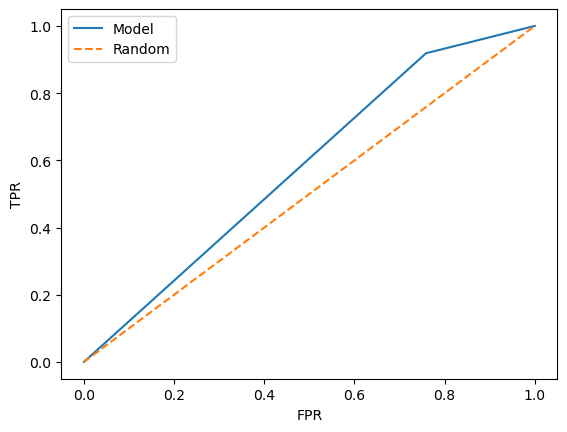

AUC Score: 0.5719796555858427


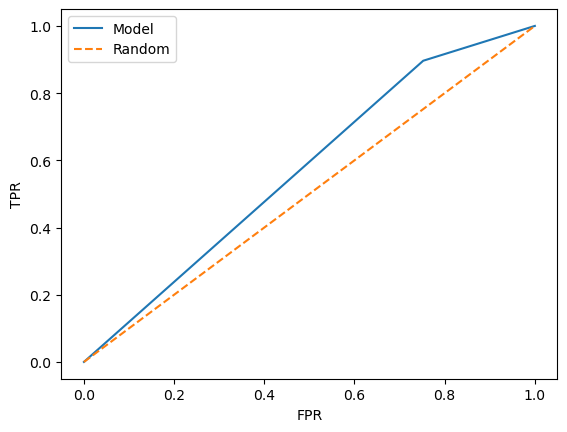

AUC Score: 0.4915630359629456


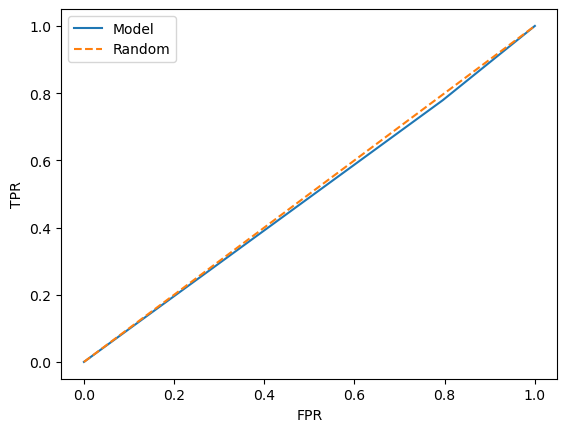

In [42]:
roc_plot(y_train, lr_preds_tr)
roc_plot(y_val, lr_preds_vl)
roc_plot(y_val, lr_preds_te)

## Save the Model

In [44]:
import pickle
# Save the model

with open("lr_model.bin", 'wb') as f_out:
    pickle.dump((dv, lr_model), f_out)

# print(f'the model is saved to {lr_model.bin}')